# 读入所有地图的训练数据

In [16]:
from tensorboard.backend.event_processing import event_accumulator
import os
import re
from glob import glob
import pandas as pd

"""
1. get all run ids
"""
info_1_names = []
for i in range(35):
    info_1_name = f"./multirun/2023-01-14/03-59-23/{i}/train_on_single_map.log"
    if not os.path.exists(info_1_name):
        print(f"not exist {info_1_name}")
    else:
        info_1_names.append(info_1_name)
info_2_names = []
for i in range(10):
    info_2_name = f"./multirun/2023-01-14/11-23-11/{i}/train_on_single_map.log"
    if not os.path.exists(info_2_name):
        print(f"not exist {info_2_name}")
    else:
        info_2_names.append(info_2_name)
all_infos = info_1_names + info_2_names
all_run_ids = []
for info in all_infos:
    # read all text from info, and then match "Current RunID:{}" in it
    with open(info, "r") as f:
        data = f.read()
        run_id = re.findall(".*Current RunID:(.*)", data)[0]
        all_run_ids.append(run_id)
print(all_run_ids)
print(len(all_run_ids))
"""
2. get all event files, and collect all data in pandas dataframe
"""
tensorboard_data_folder_name = "./runs"
all_event_files = []
for run_id in all_run_ids:
    event_file = glob(os.path.join(tensorboard_data_folder_name, run_id, "PPO_1", "*"))
    all_event_files.append(event_file[0])

all_df = []
for event_file in all_event_files:
    ea = event_accumulator.EventAccumulator(event_file,
    size_guidance={ # see below regarding this argument
        event_accumulator.SCALARS: 0,
    })
    _absorb_print = ea.Reload()
    df = pd.DataFrame(ea.Scalars("rollout/ep_rew_mean"))
    all_df.append(df)
print(all_df[0].head())

['9puln3ma', '1t390wli', 'j0pcr09r', '9hx3fcsj', '99d5hcwf', 'b16dsaam', 'xlv5o0ux', '81m7s438', 'rxi3rf0u', 'k2jfwwsw', 'epw4tcbg', 'jdhri22u', 'vwq2l1re', 'ofk4dw5u', '81y601sc', 'flkwav4t', '384z372t', 'ced5uf12', '2olcb8kd', 'jp250n7h', '0vn9azh1', '7rz1r7jc', '0b0ei6xz', '0ohps0na', '911ij69y', 'la0ydfzm', '99enaftx', 'mnx7hs13', '76qikzt2', 'pbi1fmjo', '0ydnz9i9', 'dkgi1zsk', 'atazbz1b', 'ai8fu49m', '8982kklv', 'vnsg7ncq', 'awxldpzn', 's71rcikl', '77in29tn', 'p71u30a2', 'kam2wt21', 'w0gtrygz', '5d6hnsig', 'nwljhc7a', 'a9qlhm9m']
45
      wall_time    step     value
0  1.673640e+09   32768  0.054054
1  1.673640e+09   65536  0.070000
2  1.673641e+09   98304  0.140000
3  1.673641e+09  131072  0.180000
4  1.673641e+09  163840  0.170000


### 读实验2(一个agent训所有地图)的数据

In [17]:
from tensorboard.backend.event_processing import event_accumulator
import os
import re
from glob import glob
import pandas as pd

"""
1. get all run ids
"""
all_exp2_infos = []
for i in range(3):
    info_1_name = f"./multirun/2023-01-14/03-59-49/{i}/train_on_all_maps.log"
    if not os.path.exists(info_1_name):
        print(f"not exist {info_1_name}")
    else:
        all_exp2_infos.append(info_1_name)
all_exp2_run_ids = []
for info in all_exp2_infos:
    # read all text from info, and then match "Current RunID:{}" in it
    with open(info, "r") as f:
        data = f.read()
        run_id = re.findall(".*Current RunID:(.*)", data)[0]
        all_exp2_run_ids.append(run_id)
print(all_exp2_run_ids)
print(len(all_exp2_run_ids))
"""
2. get all event files, and collect all data in pandas dataframe
"""
tensorboard_data_folder_name = "./runs"
all_exp2_event_files = []
for run_id in all_exp2_run_ids:
    event_file = glob(os.path.join(tensorboard_data_folder_name, run_id, "PPO_1", "*"))
    all_exp2_event_files.append(event_file[0])
print(all_exp2_event_files)

all_exp2_df = []
for event_file in all_exp2_event_files:
    ea = event_accumulator.EventAccumulator(event_file,
    size_guidance={ # see below regarding this argument
        event_accumulator.SCALARS: 0,
    })
    _absorb_print = ea.Reload()
    df = pd.DataFrame(ea.Scalars("rollout/ep_rew_mean"))
    all_exp2_df.append(df)
print(all_exp2_df[0].head())

['8n2e7xa4', 'w759e3id', 'brcszgcv']
3
['./runs/8n2e7xa4/PPO_1/events.out.tfevents.1673640036.jiagpu8-NF5468M6.3681039.0', './runs/w759e3id/PPO_1/events.out.tfevents.1673640036.jiagpu8-NF5468M6.3681038.0', './runs/brcszgcv/PPO_1/events.out.tfevents.1673640036.jiagpu8-NF5468M6.3681037.0']
      wall_time    step  value
0  1.673640e+09   32768   0.13
1  1.673640e+09   65536   0.07
2  1.673641e+09   98304   0.09
3  1.673641e+09  131072   0.05
4  1.673641e+09  163840   0.05


# 分析数据

## 实验1: 每个地图独立agent

## 1. 所有地图的训练数据曲线绘制在一张图上

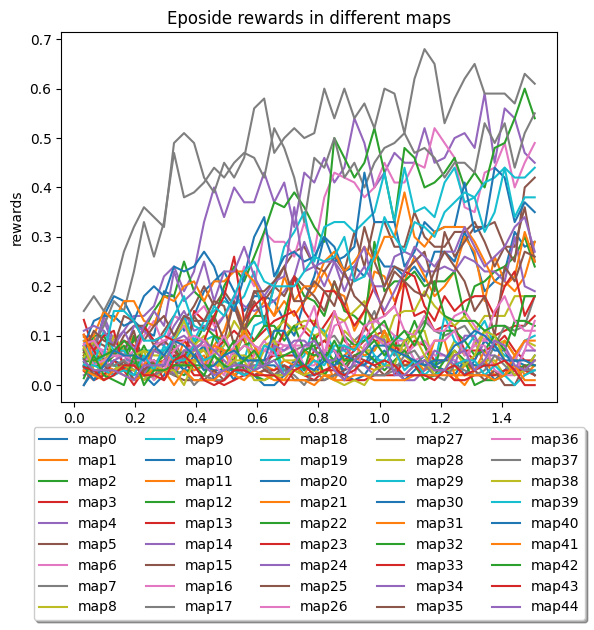

In [18]:
import matplotlib.pyplot as plt

# plot steps, rewards in one figure
all_name = []
for i, df in enumerate(all_df):
    plt.plot(df["step"], df["value"])
    all_name.append(f"map{i}")
    # legend as i
plt.xlabel("steps")
plt.ylabel("rewards")
plt.title("Eposide rewards in different maps")
# legend position in bootom
plt.legend(all_name,loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)

## 取reward在所有step上的最大值

([<matplotlib.axis.XTick at 0x12886e250>,
 [Text(0, 0, '0'),
  Text(5, 0, '5'),
  Text(10, 0, '10'),
  Text(15, 0, '15'),
  Text(20, 0, '20'),
  Text(25, 0, '25'),
  Text(30, 0, '30'),
  Text(35, 0, '35'),
  Text(40, 0, '40')])

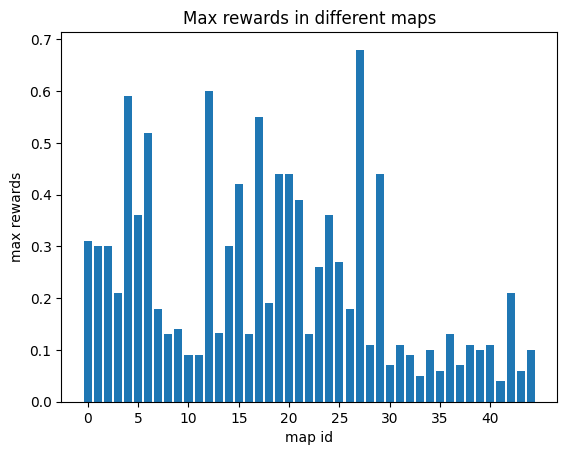

In [19]:
import numpy as np
all_map_max_rewards = {}
for j, df in enumerate(all_df):
    all_map_max_rewards[j] = np.max(df["value"])
plt.bar(all_map_max_rewards.keys(), all_map_max_rewards.values())
plt.xlabel("map id")
plt.ylabel("max rewards")
plt.title("Max rewards in different maps")
plt.xticks(np.arange(0, 45, 5))
# sorted_all_map_max_rewards = sorted(all_map_max_rewards.items(), key=lambda x: x[1], reverse=False)
# print(sorted_all_map_max_rewards)

## 和人类容易度评分求相关性

#### step1 取人类数据

In [20]:
# %% 读被试数据
import json
def merge_to_json(input_file:str) -> list:
    with open(input_file) as infile:
        data = [json.loads(line) for line in infile]
    return data

data_path = "results/jatos_results_20221230073850.txt"
participants_datas = merge_to_json(data_path)
print(f"Number of participants: {len(participants_datas)}")
# %% 排序分析
from natsort import natsorted
import numpy as np

all_personal_information = []
all_trials = []
all_sorted_results = []
for participant_data in participants_datas:
    personal_informations = participant_data[2]['response']
    all_personal_information.append(personal_informations)
    all_trials.append(participant_data[4:-2])
    sorted_results = participant_data[-1]['sorted_result']
    all_sorted_results.append(sorted_results)
# # 难度评分变成容易度评分
# # reverse a list: all_sorted_results
# reverse_sorted_results = all_sorted_results.copy()
# for i in range(len(reverse_sorted_results)):
#     reverse_sorted_results[i].reverse()
# print(reverse_sorted_results)
all_scored_results = []
for result in all_sorted_results:
    k = 1/len(result)
    scored_results = {}
    for i in range(len(result)):
        score = k * i
        scored_results[result[i]] = score
    all_scored_results.append(scored_results)

nat_sorted_scored_results = []
for scored_results in all_scored_results:
    nat_sorted_scored_results.append({key:scored_results[key] for key in natsorted(scored_results.keys())})
each_image_scores = {}
for name in nat_sorted_scored_results[0].keys():
    each_image_scores[name] = []
for scored_results in nat_sorted_scored_results:
    for name, score in scored_results.items():
        each_image_scores[name].append(score)
for image, scores in each_image_scores.items():
    each_image_scores[image] = np.mean(scores)
# sort each_image_scores as value
sorted_each_image_scores = sorted(each_image_scores.items(), key=lambda x:x[1], reverse=False)
# remove .png from sorted_each_image_scores keys, and int 
sorted_each_image_scores = [(int(name[:-4]), score) for name, score in sorted_each_image_scores]

key_sorted_each_image_scores = sorted(sorted_each_image_scores, key=lambda x:x[0])
print(key_sorted_each_image_scores)

Number of participants: 8
[(0, 0.31666666666666665), (1, 0.5), (2, 0.5194444444444444), (3, 0.6527777777777778), (4, 0.2694444444444445), (5, 0.4555555555555556), (6, 0.4305555555555556), (7, 0.4166666666666667), (8, 0.575), (9, 0.31666666666666665), (10, 0.5472222222222223), (11, 0.7638888888888888), (12, 0.10555555555555557), (13, 0.6055555555555556), (14, 0.32222222222222224), (15, 0.3944444444444445), (16, 0.4638888888888889), (17, 0.26388888888888895), (18, 0.49722222222222223), (19, 0.43333333333333335), (20, 0.3944444444444445), (21, 0.2), (22, 0.4833333333333333), (23, 0.08888888888888889), (24, 0.3055555555555556), (25, 0.4083333333333334), (26, 0.5055555555555556), (27, 0.06666666666666667), (28, 0.5916666666666667), (29, 0.21666666666666667), (30, 0.7166666666666667), (31, 0.8361111111111111), (32, 0.8555555555555555), (33, 0.9305555555555556), (34, 0.7805555555555556), (35, 0.6361111111111112), (36, 0.2638888888888889), (37, 0.8833333333333334), (38, 0.3055555555555556), (3

#### step2 求人类难度评分和Agent实际游玩难度的相关性

[0.31       0.30000001 0.30000001 0.20999999 0.58999997 0.36000001
 0.51999998 0.18000001 0.13       0.14       0.09       0.09
 0.60000002 0.13207547 0.30000001 0.41999999 0.13       0.55000001
 0.19       0.44       0.44       0.38999999 0.13       0.25999999
 0.36000001 0.27000001 0.18000001 0.68000001 0.11       0.44
 0.07       0.11       0.09       0.05       0.1        0.06
 0.13       0.07       0.11       0.1        0.11       0.04
 0.20999999 0.06       0.1       ]


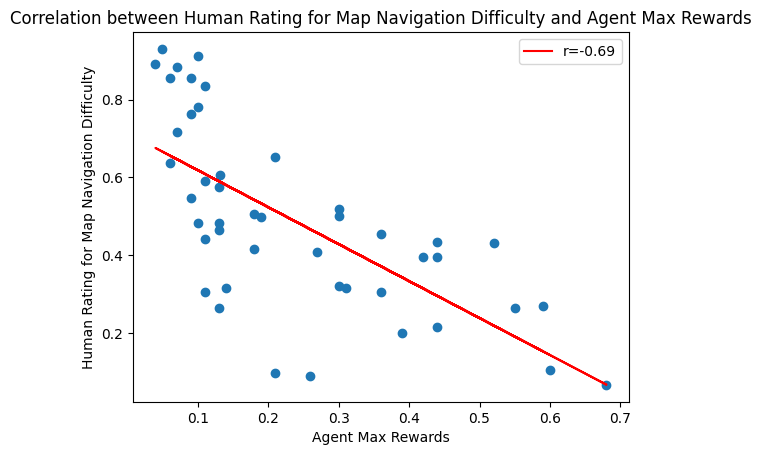

In [30]:
# key_sorted_each_image_scores and all_map_max_rewards
human_sorted_each_image_scores = np.array(key_sorted_each_image_scores)
np_all_map_max_rewards = np.array(list(all_map_max_rewards.items()))
print(np_all_map_max_rewards[:, 1])
# plot np_key_sorted_normed_diver and human_sorted_each_image_scores, show the correlation
plt.figure()
plt.plot(np_all_map_max_rewards[:,1], human_sorted_each_image_scores[:, 1], 'o')
plt.xlabel("Agent Max Rewards")
plt.ylabel("Human Rating for Map Navigation Difficulty")
plt.title("Correlation between Human Rating for Map Navigation Difficulty and Agent Max Rewards")
# plot its r line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(np_all_map_max_rewards[:,1], human_sorted_each_image_scores[:, 1])
line = slope*np_all_map_max_rewards[:,1]+intercept
plt.plot(np_all_map_max_rewards[:,1], line, 'r', label=f'r={r_value:.2f}')
plt.legend()
plt.show()

#### Step3: 求散度评估和Agent实际游玩难度的相关性

##### Step3.1: 取散度评估数据

In [25]:
# key_sorted_each_image_scores
from graph_analysis import DiGraphStats
from map2graph import map2digraph, get_map_shortest_length_dist
from utils import tiles2data, tilemap2heightmap, cs_divergence
import fastwfc
import matplotlib.pyplot as plt
import numpy as np
import os
from utils import json_to_tileid
from natsort import natsorted
from glob import glob

json_path = "./stimulus_jsons/"
wfc = fastwfc.XLandWFC("samples.xml")
empty = wfc.get_ids_from_wave(wfc.build_a_open_area_wave())
empty_dist = get_map_shortest_length_dist(map2digraph(tiles2data(empty)), norm=False)
all_json_files = natsorted(glob(json_path+"*.json"))
all_map_diver = {}
for i,json_file in enumerate(all_json_files):
    ids = json_to_tileid(json_file)
    dist = get_map_shortest_length_dist(map2digraph(tiles2data(ids)), norm=False)
    divergence = cs_divergence(empty_dist, dist)
    all_map_diver[i] = divergence
# min max norm
normed_diver = {}
for i, diver in all_map_diver.items():
    normed_diver[i] = (diver - min(all_map_diver.values()))/(max(all_map_diver.values())-min(all_map_diver.values()))
print(normed_diver)


{0: 0.32362461529801617, 1: 0.23530439550982957, 2: 0.3182668624205822, 3: 0.2841023522512254, 4: 0.23860566543266565, 5: 0.2556053583655328, 6: 0.26367169058773726, 7: 0.11384733112712259, 8: 0.46978765105835335, 9: 0.3409916139210186, 10: 0.41946286889037426, 11: 0.4639039073168998, 12: 0.0, 13: 0.24073537895176145, 14: 0.24186887182256425, 15: 0.22137575427384037, 16: 0.5333580201294037, 17: 0.2647697323486005, 18: 0.43129535966155647, 19: 0.14581157344046525, 20: 0.26195316847527805, 21: 0.21759837499895918, 22: 0.40659117839149267, 23: 0.41800620085641693, 24: 0.2124669443240021, 25: 0.2674479534423269, 26: 0.33496426658709466, 27: 0.1615246604384977, 28: 0.4377238996774729, 29: 0.12496347478490384, 30: 0.8024200384685436, 31: 0.8705646236388825, 32: 0.6368016710883502, 33: 0.9903693561400456, 34: 0.33142649986820755, 35: 0.8486420024882204, 36: 0.5367270433440504, 37: 1.0, 38: 0.7824972593244185, 39: 0.9026676756913524, 40: 0.7525104613081524, 41: 0.7744275106328075, 42: 0.223559

Results for Spearman's correlation and Pearson's correlation between EmptyDivergence and Agent Max Rewards
Spearmans correlation: -0.856
Pearsons correlation: -0.722


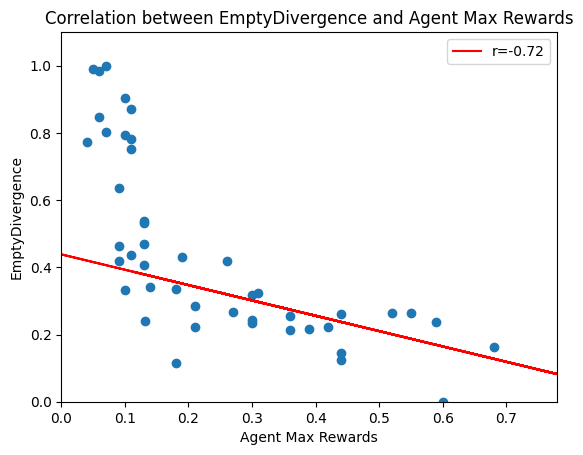

In [34]:
key_sorted_normed_diver = [(name, score) for name, score in normed_diver.items()]
np_key_sorted_normed_diver = np.array(key_sorted_normed_diver)
np_all_map_max_rewards = np.array(list(all_map_max_rewards.items()))

# 分析np_key_sorted_normed_diver和np_all_map_max_rewards的Spearman 相关系数和pearson 相关系数
from scipy.stats import spearmanr, pearsonr
s_corr, _ = spearmanr(np_all_map_max_rewards[:,1], np_key_sorted_normed_diver[:,1])
P_corr, _ = pearsonr(np_all_map_max_rewards[:,1], np_key_sorted_normed_diver[:,1])
print(f"Results for Spearman's correlation and Pearson's correlation between EmptyDivergence and Agent Max Rewards")
print('Spearmans correlation: %.3f' % s_corr)
print('Pearsons correlation: %.3f' % P_corr)
plt.figure()
plt.plot(np_all_map_max_rewards[:, 1], np_key_sorted_normed_diver[:,1], 'o')
plt.xlabel("Agent Max Rewards")
plt.ylabel("EmptyDivergence")
plt.title("Correlation between EmptyDivergence and Agent Max Rewards")
plt.xlim(0, np.max(np_all_map_max_rewards[:, 1])+0.1)
plt.ylim(0, np.max(np_key_sorted_normed_diver[:,1])+0.1)
# plot its r line
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(np_key_sorted_normed_diver[:,1], np_all_map_max_rewards[:, 1])
line = slope*np_key_sorted_normed_diver[:,1]+intercept
plt.plot(np_key_sorted_normed_diver[:,1], line, 'r', label=f'r={r_value:.2f}')
plt.legend()
plt.show()

In [42]:
# analysis of covariance of three variables: human rating, agent max rewards, and empty divergence


## 实验2: 所有地图共用一个agent

## 1. 所有地图的训练数据曲线绘制在一张图上

In [ ]:
import matplotlib.pyplot as plt

# plot steps, rewards in one figure
all_name = ["map0-16", "map16-32","map32-45"]
for i, df in enumerate(all_exp2_df):
    plt.plot(df["step"], df["value"])
    # legend as i
plt.xlabel("steps")
plt.ylabel("rewards")
plt.title("Eposide rewards in different maps")
# legend position in bootom
plt.legend(all_name,loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)